In [8]:
#!pip3 install yfinance

import yfinance as yf
print(yf.__version__)

data = yf.download("BTC-USD", start="2014-09-17")
print(data)

0.2.43


[*********************100%***********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-10-12  62444.617188  63448.785156  62443.269531  63193.023438   
2024-10-13  63192.945312  63272.652344  62035.636719  62851.375000   
2024-10-14  62848.398438  66482.492188  62442.152344  66046.125000   
2024-10-15  66050.367188  67881.679688  64809.195312  67041.109375   
2024-10-16  67053.132812  67469.257812  66790.921875  67013.390625   

               Adj Close       Volume  
Date                                   
2014-09-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


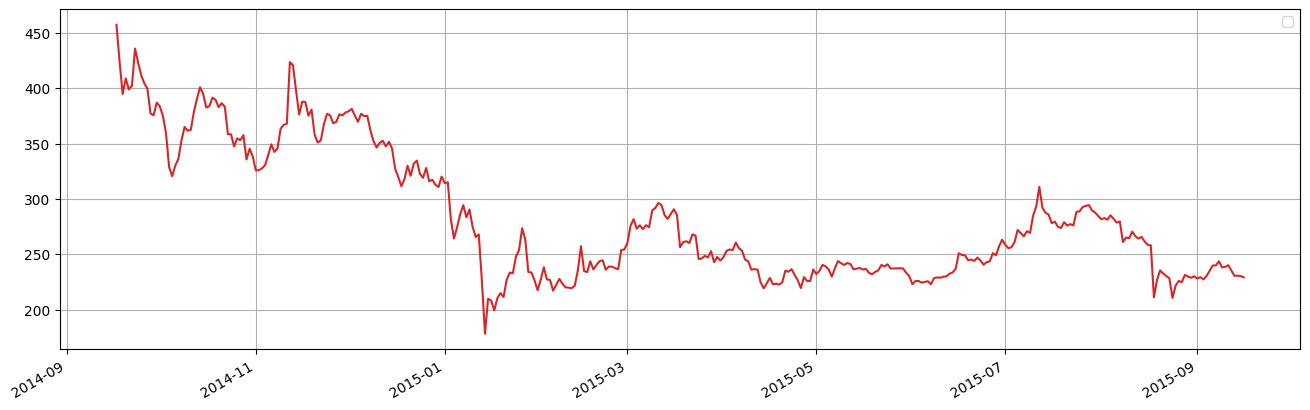

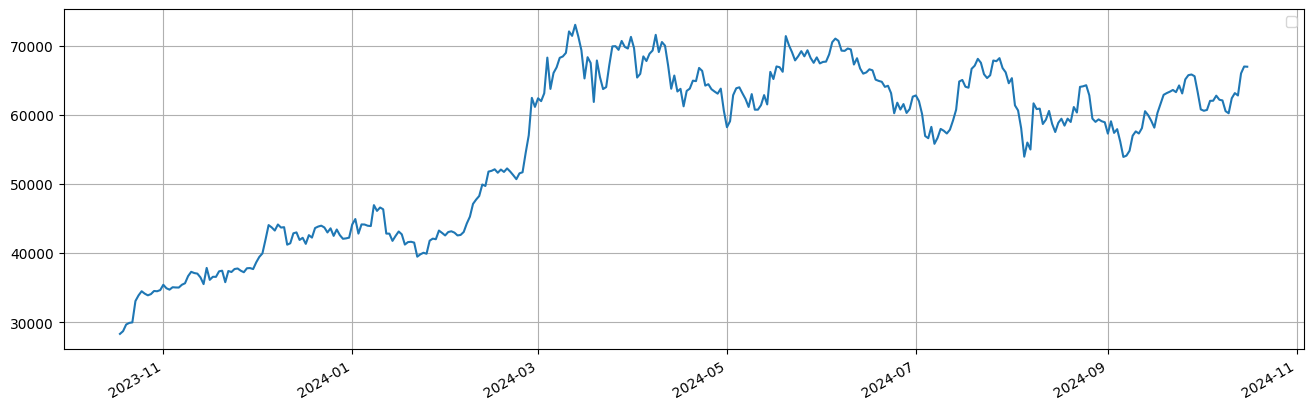

In [9]:
data["prev"] = data["Close"].shift(1)

data1 = data.head(365)
data2 = data.tail(365)


import timeseries
import importlib
importlib.reload(timeseries)

timeseries.plot(data1["Close"])
timeseries.plot(data2["Close"], color="tab:blue")

                 Close        prev
Date                              
2014-09-17  457.334015         NaN
2014-09-18  424.440002  457.334015
2014-09-19  394.795990  424.440002
2014-09-20  408.903992  394.795990
2014-09-21  398.821014  408.903992
...                ...         ...
2015-09-12  235.229004  240.106995
2015-09-13  230.511993  235.229004
2015-09-14  230.643997  230.511993
2015-09-15  230.304001  230.643997
2015-09-16  229.091003  230.304001

[365 rows x 2 columns]
                   Close          prev
Date                                  
2023-10-18  28328.341797  28415.748047
2023-10-19  28719.806641  28328.341797
2023-10-20  29682.949219  28719.806641
2023-10-21  29918.412109  29682.949219
2023-10-22  29993.896484  29918.412109
...                  ...           ...
2024-10-12  63193.023438  62445.089844
2024-10-13  62851.375000  63193.023438
2024-10-14  66046.125000  62851.375000
2024-10-15  67041.109375  66046.125000
2024-10-16  67013.390625  67041.109375

[365 rows x 2

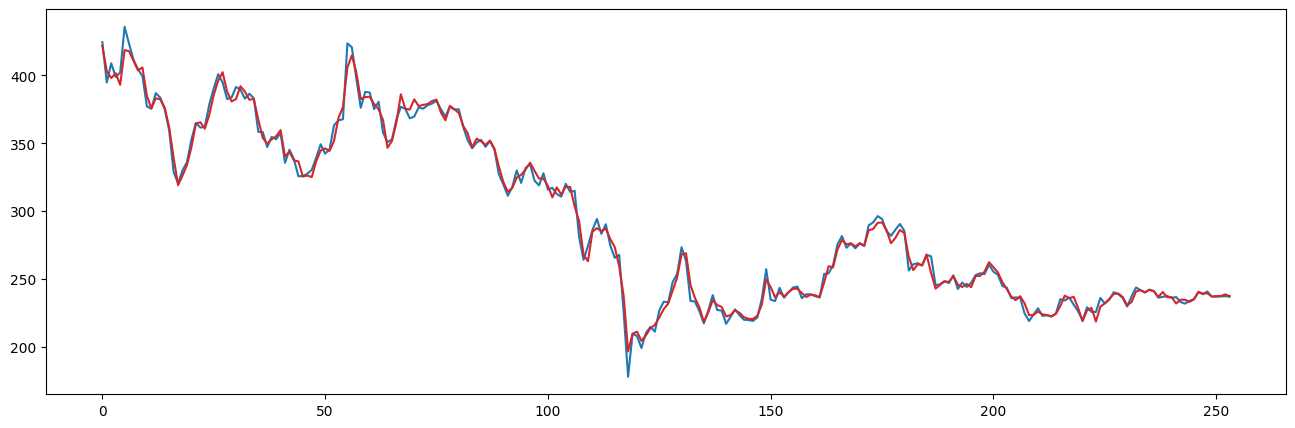

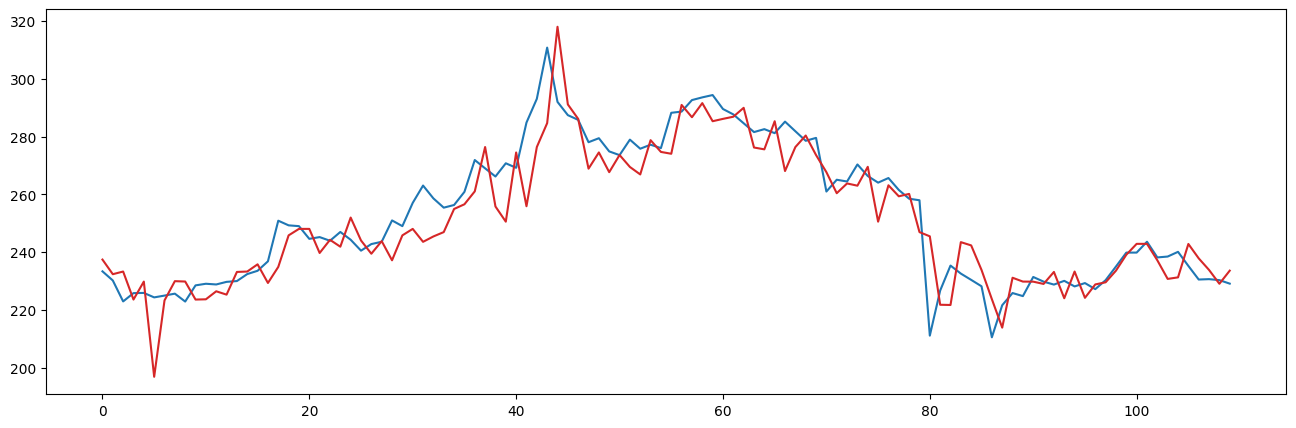

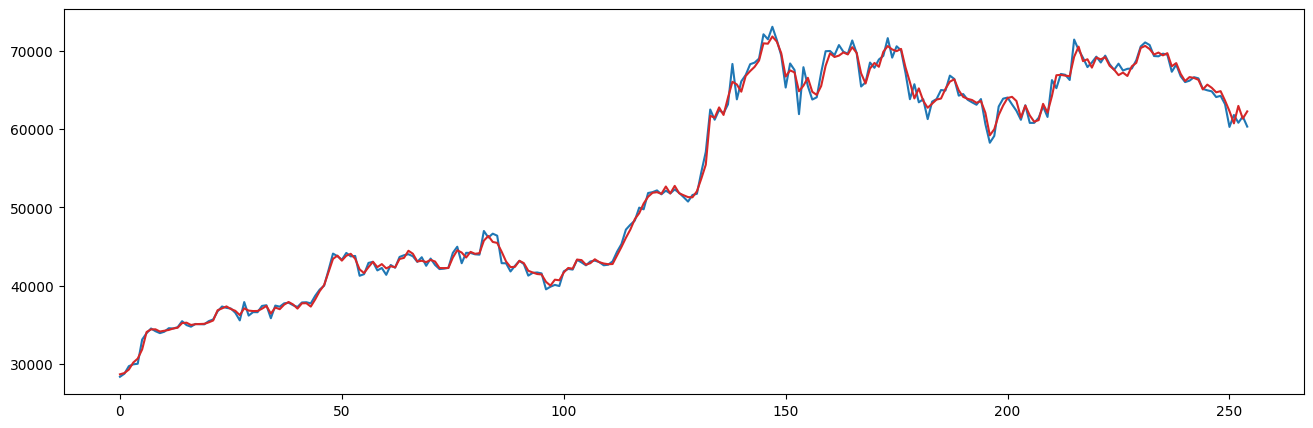

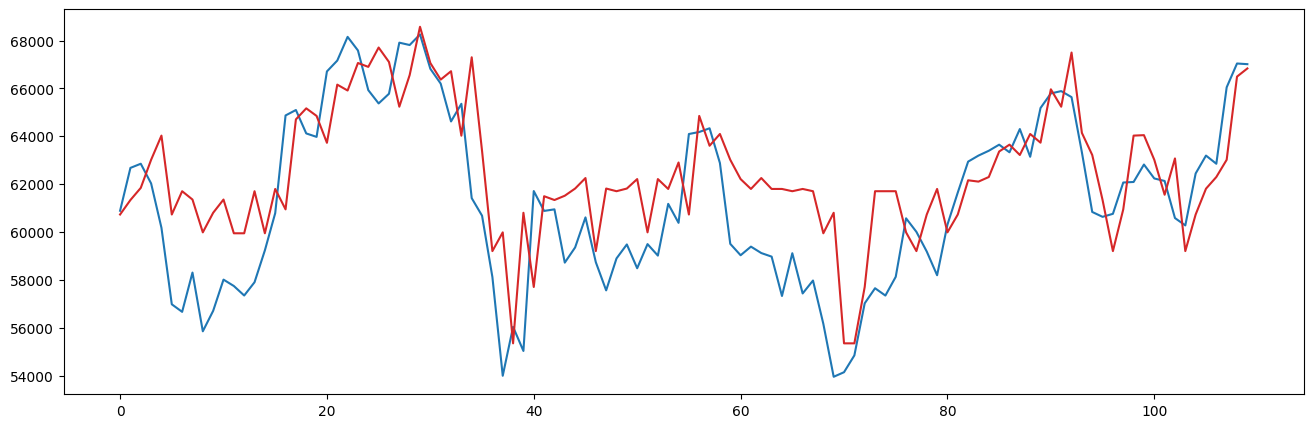

In [10]:
data1 = data1[["Close", "prev"]]
print(data1)

data2 = data2[["Close", "prev"]]
print(data2)

import timeseries
import importlib
importlib.reload(timeseries)

tsmodel = timeseries.TimeSeriesRandomForestRegressor(data1.dropna(), "Close")
fit = tsmodel.fit()

timeseries.timeseries_model_eval(fit, tsmodel.X_train, tsmodel.y_train)
timeseries.timeseries_model_eval(fit, tsmodel.X_test, tsmodel.y_test)


tsmodel = timeseries.TimeSeriesRandomForestRegressor(data2.dropna(), "Close")
fit = tsmodel.fit()

timeseries.timeseries_model_eval(fit, tsmodel.X_train, tsmodel.y_train)
timeseries.timeseries_model_eval(fit, tsmodel.X_test, tsmodel.y_test)